In [1]:
import os
import sys
import pprint as pp
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# set the main directory to import qel instruments drivers
sys.path.append(os.getcwd().replace('\\documents\\measure_notebooks\\Two_Transmon_MAP_gate_sequence',''))
from instruments.Tektronix_AWG5208.TektronixAWG_core_v2 import AWG5208

In [3]:
# connect to AWG
awg = AWG5208(inst_visaAddress='TCPIP0::192.168.20.43::inst0::INSTR')
# help(awg)
# set sampling rate and reference clock
awg.set_sample_rate(sample_rate=1.0E9)
awg.set_extref_source(ref_freq=10E6)

Connect to Tektronix_AWG_5208 successfully
Statement: TEKTRONIX,AWG5208,B030598,FV:6.6.0131.0


plot size=[20,3]


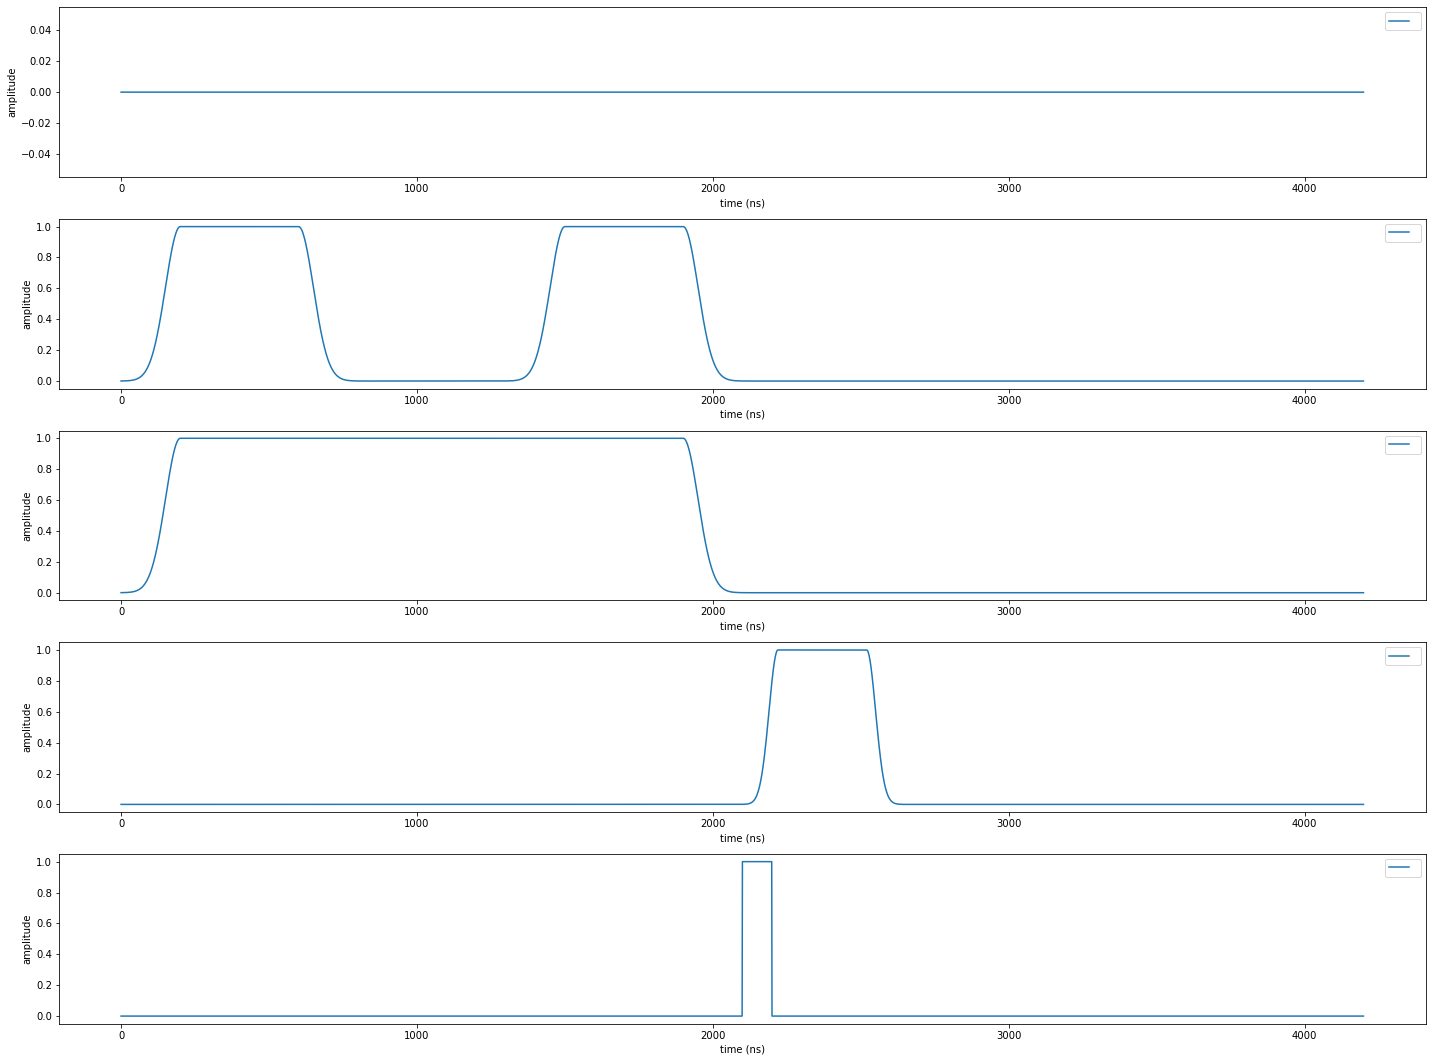

4200


In [4]:
# assign waveforms
from WaveForm_Editor import *
from WavetoolsV6 import Wave

sampling_rate = 1e9
gen_wfm_amount = 10 

ChannelList = ['Q1', 'Q2', 'AC_Stark','ReadOut']


drive_sigmalen = 50
readout_sigmalen = 30

ramsey_half_pi = 400
ramsey_precession = 500

readout_sigmalen = 30
readout_duration = 300

mkr_duration = 100

offset_1 = 100
offset_2 = 200


ACStark_duration  =  drive_sigmalen*8 + ramsey_half_pi*2 + ramsey_precession 

a = Wave(NullPulse,[offset_1])  

b = Wave(GaussianPulse,[drive_sigmalen,ramsey_half_pi])

c = Wave(GaussianPulse,[drive_sigmalen,ACStark_duration])

d = Wave(NullPulse,[ramsey_precession])
      
e = Wave(GaussianPulse,[readout_sigmalen,readout_duration])

m = Wave(SquarePulse,[mkr_duration])

n = Wave(NullPulse,[offset_2]) 


qb1 = ~a

qb2 = ~b + ~d + ~b 

AC_Stark = ~c 

readout = ~e

mkr = ~m

Null = ~a 





gate = ~qb1 / ~qb2 / ~AC_Stark / ~Null/ ~Null

ReadOut = ~Null / ~Null/ ~Null / ~readout / ~mkr

output = gate + ReadOut
#output = gate

output.plot(size=[20,3])

print(len(output.y[0]))

# clear, set, and upload
awg.clr_wfm()

awg.set_wfm(wfm_name=f'{ChannelList[0]}', wfm=(output.y[0]))
awg.set_wfm(wfm_name=f'{ChannelList[1]}', wfm=(output.y[1]))
awg.set_wfm(wfm_name=f'{ChannelList[2]}', wfm=(output.y[2]))
awg.set_wfm(wfm_name=f'{ChannelList[3]}', wfm=(output.y[3]),mkr1=(output.y[4]))
awg.upload_wfm()


In [5]:
"""
# assign waveform to corresponding sequence position one at a time
seq_name='MAP_gate'
trackList = ChannelList

# clear, set, assign and upload

awg.clr_seq()
awg.set_seq(seq_name, num_track=len(trackList), num_step=gen_wfm_amount)
for track_idx, track in enumerate(trackList):
    for step_idx, freq in enumerate(freq_range):
        awg.assign_seq(f'{track}_{freq}', seq_name, track_idx+1, step_idx+1)
awg.upload_seq(seq_name)
"""

"\n# assign waveform to corresponding sequence position one at a time\nseq_name='MAP_gate'\ntrackList = ChannelList\n\n# clear, set, assign and upload\n\nawg.clr_seq()\nawg.set_seq(seq_name, num_track=len(trackList), num_step=gen_wfm_amount)\nfor track_idx, track in enumerate(trackList):\n    for step_idx, freq in enumerate(freq_range):\n        awg.assign_seq(f'{track}_{freq}', seq_name, track_idx+1, step_idx+1)\nawg.upload_seq(seq_name)\n"

In [6]:
# assign waveforms/sequences to channels
#awg.assign_ch(1, 'MAP_gate', track_index=1)
#awg.assign_ch(2, 'MAP_gate', track_index=2)# for sequence 
#awg.assign_ch(1, f'{ChannelList[0]}', auto_output=False, auto_mkr=False)
#awg.assign_ch(2, f'{ChannelList[1]}', auto_output=False, auto_mkr=False)
#awg.assign_ch(3, f'{ChannelList[2]}', auto_output=False, auto_mkr=False)
#awg.assign_ch(4, f'{ChannelList[3]}', auto_output=False, auto_mkr=True)
#awg.assign_ch(5, 'Q_1000000.0', auto_output=False, auto_mkr=False)# for waveform

In [7]:
# set channel amplitudes
awg.set_ch_amp(ch=1, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)
awg.set_ch_amp(ch=2, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)
awg.set_ch_amp(ch=3, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)
awg.set_ch_amp(ch=4, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)
awg.set_ch_amp(ch=5, wfm_Vpp=1.0, wfm_offset=0., mkr1=1.0, mkr2=1.0, mkr3=1.0, mkr4=1.0)

In [8]:
print(awg)
# del awg

Tektronix_AWG_5208 @ TCPIP0::192.168.20.43::inst0::INSTR
---
Waveform list: dict_keys(['Q1', 'Q2', 'AC_Stark', 'ReadOut'])
Sequence list: dict_keys([])
AWG Error state: 0,"No error"
